# Síntese da primeira semana do terceiro experimento

Grupo GD18

## Arranjo experimental

Para essa semana, o arranjo utilizado consiste em

* Motor de passo para webcam
* Câmera USB modelo Philips SPC530NC
* Lâmpada de mércurio
* Arranjo de fenda para refratar a luz

## Procedimento experimental

Inicialmente, identifica-se o intervalo em passos no qual estão contidos os picos de intensidade. Ao explorar livremente com a câmera, foram encontrados 17 picos de intensidade de luz nos seguintes valores aproximados de passos e cores em parênteses:

<table>
    <tr>
        <td>2000 (vermelho)</td>
        <td>3200 (vermelho)</td>
        <td>5000 (vermelho)</td>
        <td>7600 (vermelho)</td>
        <td>8000 (vermelho)</td>
        <td>10000 (amarelo)</td>
        <td>10200 (amarelo)</td>
        <td>10500 (verde-amarelo)</td>
        <td>11200 (verde)</td>
    </tr>
    <tr>
        <td>12000 (verde)</td>
        <td>13200 (verde)</td>
        <td>15500 (ciano)</td>
        <td>18500 (azul)</td>
        <td>20500 (violeta)</td>
        <td>21000 (violeta)</td>
        <td>22000 (violeta)</td>
        <td>22800 (violeta)</td>
    </tr>
</table>

Com a informação da localização dos picos, foi então ajustado os parâmetros da câmera para se adquirir os dados do espectro da luz, na qual foram utilizados uma resolução de 1280x1024 para a câmera e um intervalo de passos entre 4000 e 16000 espaçados em 2.

## Resultados

Os resultados da aquisição de dados estão expressos pelo blocos seguintes, na qual se exibe a intensidade dos quadros por localização em número de passo

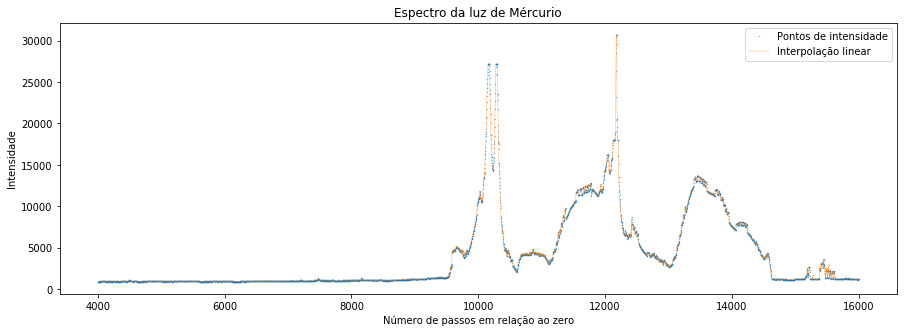

In [4]:
# Dependências
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig
import scipy.optimize as opt
import os
plt.rcParams["figure.figsize"] = (15, 5)

# Caminho para o arquivo.csv com os dados
data_path = os.path.expanduser("~/shared/Lab5_GD18/Exp3_Sem1/calibracao.csv")

# Carregar os dados
data = pd.read_csv(data_path, delimiter=";")
X = data.Passo
Y = data.Intensidade

# Exibir os resultados
plt.plot(X, Y, '.', markersize=0.5, label="Pontos de intensidade")
plt.plot(X, Y, '-', linewidth=0.3, label="Interpolação linear")
plt.title("Espectro da luz de Mércurio")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

## Análise

Para a obtenção dos picos, utilizamos de uma função embutida no pacote scipy que leva em consideração a derivada da vizinhança dos pontos para a detecção de candidatos a picos para posterior seleção utilizando-se de critérios como a promeniência do pico, a distance entre os picos vizinhos e a largura do pico.

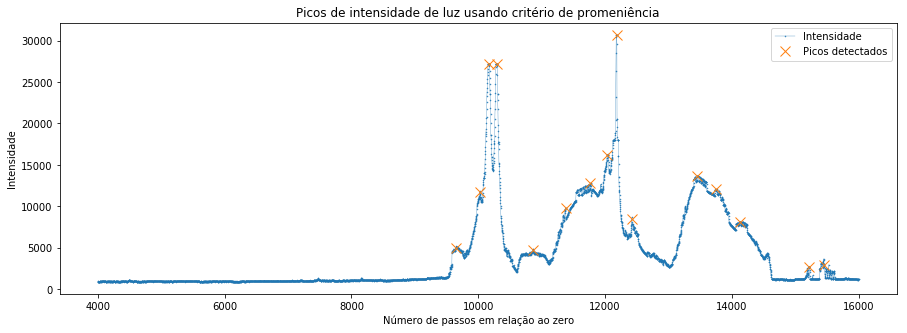

In [5]:
# Aquisição de picos pela promeniência

n = 20
Yp = np.log(Y)
Xp = X.rolling(n).max()[n:]
Yp = Y.rolling(n).max()[n:]
i_peaks = sig.find_peaks(Yp, prominence=500, distance=50, width=10)[0]
X_peaks = X[i_peaks + n/2]
Y_peaks = Y[i_peaks + n/2]
plt.plot(X, Y, '.-', linewidth=0.3, markersize=1)
plt.plot(X_peaks, Y_peaks, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

In [3]:
for peak in i_peaks:
    print_text = "Pico no passo {} com intensidade {}".format(X[peak], Y[peak])
    print(print_text)

Pico no passo 9634 com intensidade 4654
Pico no passo 10002 com intensidade 10881
Pico no passo 10144 com intensidade 25352
Pico no passo 10268 com intensidade 23709
Pico no passo 10838 com intensidade 4317
Pico no passo 11356 com intensidade 8654
Pico no passo 11748 com intensidade 11800
Pico no passo 12016 com intensidade 14946
Pico no passo 12162 com intensidade 18816
Pico no passo 12400 com intensidade 6356
Pico no passo 13432 com intensidade 13021
Pico no passo 13734 com intensidade 12014
Pico no passo 14100 com intensidade 7689
Pico no passo 15190 com intensidade 2442
Pico no passo 15426 com intensidade 3151
